In [100]:
# Import Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [101]:
epl_data = pd.read_csv(r"C:\Users\dovbi\Downloads\pl_table_2023_24.csv")

In [103]:
# Display the first 5 rows to understand the structure of the dataset
epl_data.head()

,idx,name,played,wins,draws,losses,scoresStr,goalConDiff,pts
0,1,Manchester City,38,28,7,3,96-34,62,91
1,2,Arsenal,38,28,5,5,91-29,62,89
2,3,Liverpool,38,24,10,4,86-41,45,82
3,4,Aston Villa,38,20,8,10,76-61,15,68
4,5,Tottenham Hotspur,38,20,6,12,74-61,13,66


In [104]:
# Get more information about the data
epl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idx          20 non-null     int64 
 1   name         20 non-null     object
 2   played       20 non-null     int64 
 3   wins         20 non-null     int64 
 4   draws        20 non-null     int64 
 5   losses       20 non-null     int64 
 6   scoresStr    20 non-null     object
 7   goalConDiff  20 non-null     int64 
 8   pts          20 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ KB


In [106]:
# Check for missing values
epl_data.isnull().sum()

# No missing values

idx            0
name           0
played         0
wins           0
draws          0
losses         0
scoresStr      0
goalConDiff    0
pts            0
dtype: int64

In [107]:
# check for duplicate values
epl_data.duplicated().sum()

# No duplicate values

0

In [108]:
epl_data.describe()

,idx,played,wins,draws,losses,goalConDiff,pts
count,20.00000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,38.0,14.900000,8.200000,14.900000,0.000000,52.300000
std,5.91608,0.0,6.927444,1.735087,6.512336,31.833448,20.596627
min,1.00000,38.0,3.000000,5.000000,3.000000,-69.000000,16.000000
25%,5.75000,38.0,11.500000,7.000000,11.750000,-14.250000,39.750000
50%,10.50000,38.0,13.000000,8.500000,14.500000,-6.500000,48.500000
75%,15.25000,38.0,18.500000,9.000000,18.250000,14.250000,63.750000
max,20.00000,38.0,28.000000,12.000000,28.000000,62.000000,91.000000


In [109]:
# Extracting goals scored and conceded from 'scoresStr'
epl_data[['Goals_Scored', 'Goals_Conceded']] = epl_data['scoresStr'].str.split('-', expand=True).astype(int)



In [111]:
# Summary statistics
summary_stats = epl_data.describe()

In [113]:
# Top teams based on points
top_teams = epl_data.sort_values(by='pts', ascending=False)



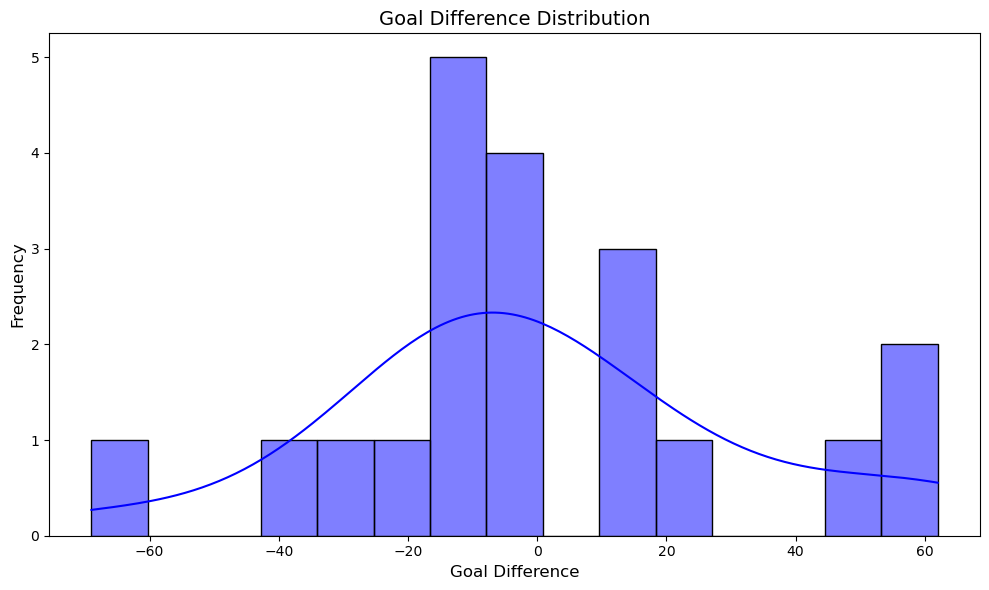

In [114]:
# Visualization: Goal Difference Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=epl_data, x='goalConDiff', bins=15, kde=True, color='blue')
plt.title('Goal Difference Distribution', fontsize=14)
plt.xlabel('Goal Difference', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

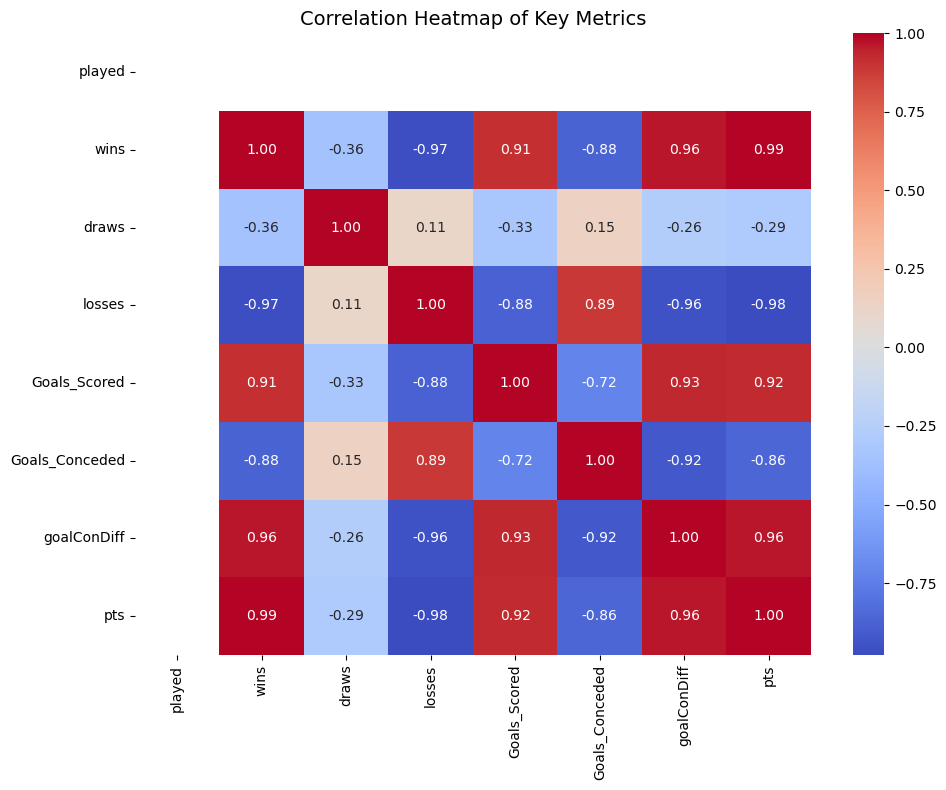

In [116]:
# Visualization: Correlation Heatmap of Key Metrics
plt.figure(figsize=(10, 8))
correlation_matrix = epl_data[['played', 'wins', 'draws', 'losses', 'Goals_Scored', 'Goals_Conceded', 'goalConDiff', 'pts']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Metrics', fontsize=14)
plt.tight_layout()
plt.show()

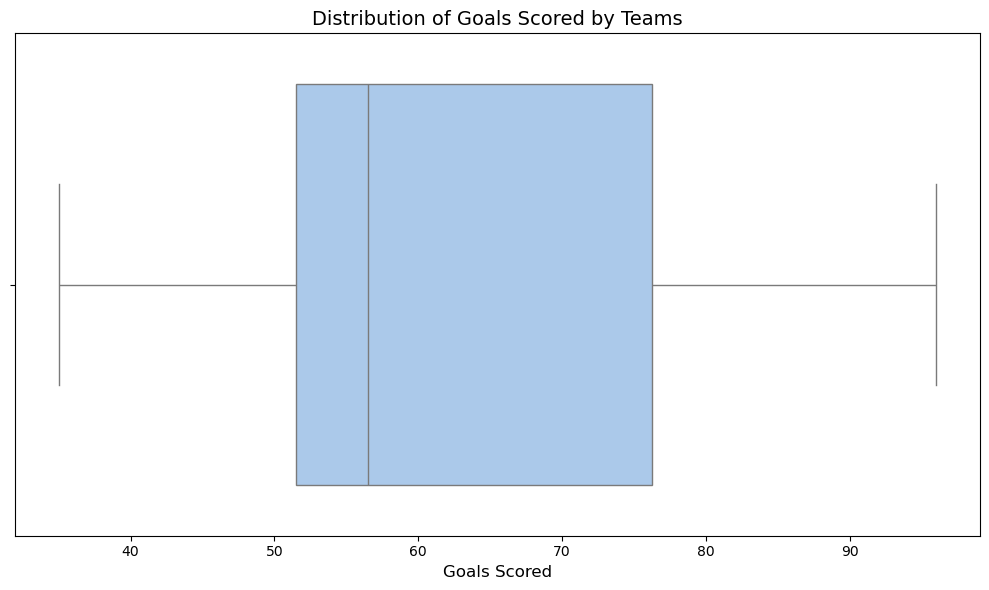

In [118]:
# Visualization: Distribution of Goals Scored
plt.figure(figsize=(10, 6))
sns.boxplot(data=epl_data, x='Goals_Scored', palette='pastel')
plt.title('Distribution of Goals Scored by Teams', fontsize=14)
plt.xlabel('Goals Scored', fontsize=12)
plt.tight_layout()
plt.show()

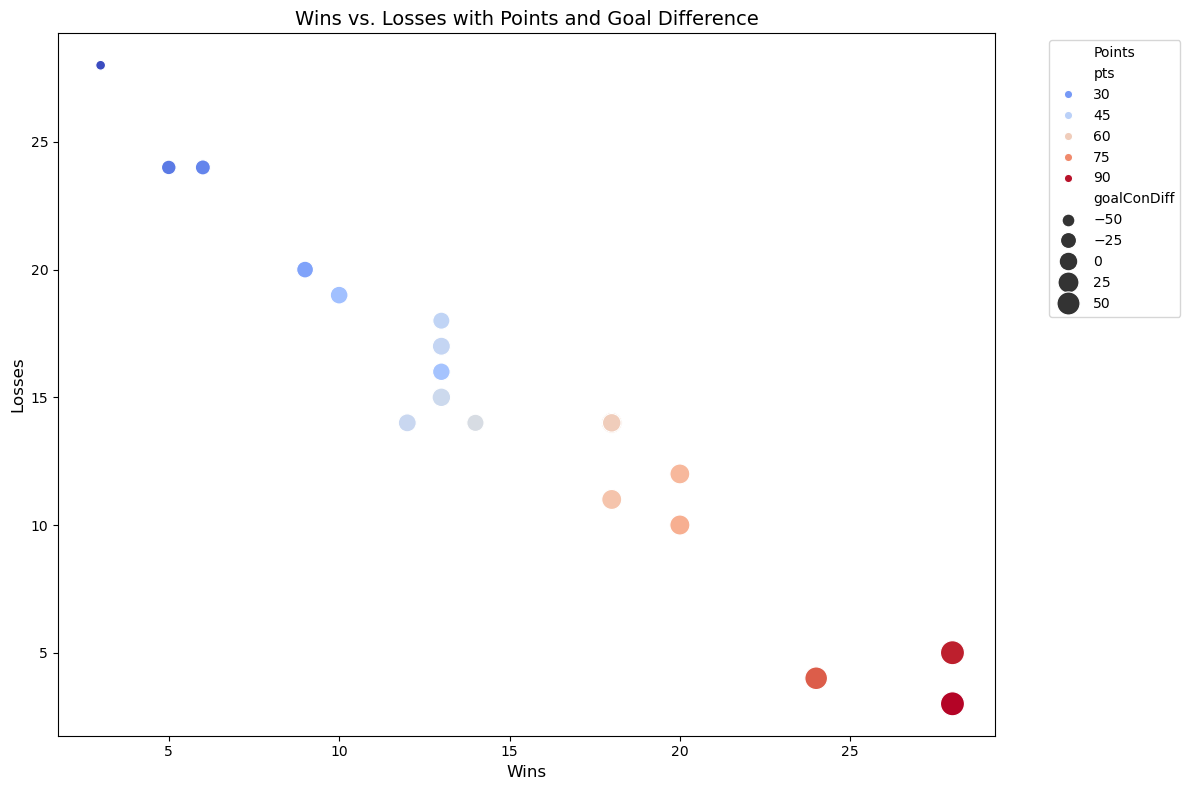

In [119]:
# Visualization: Wins vs. Losses for All Teams
plt.figure(figsize=(12, 8))
sns.scatterplot(data=epl_data, x='wins', y='losses', hue='pts', size='goalConDiff',
                sizes=(50, 300), palette='coolwarm', legend='brief')
plt.title('Wins vs. Losses with Points and Goal Difference', fontsize=14)
plt.xlabel('Wins', fontsize=12)
plt.ylabel('Losses', fontsize=12)
plt.legend(title='Points', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [121]:
# summary statistics for the dataset
summary_statistics = epl_data.describe().transpose()



In [123]:
# Renaming index for better readability
summary_statistics.index = summary_statistics.index.str.replace('_', ' ').str.title()

In [124]:
# summary statistics for the dataset
summary_statistics = epl_data.describe().transpose()

# Renaming index for better readability
summary_statistics.index = summary_statistics.index.str.replace('_', ' ').str.title()

# Printing the summary statistics table
print(summary_statistics)

                count  mean        std   min    25%   50%    75%    max
Idx              20.0  10.5   5.916080   1.0   5.75  10.5  15.25   20.0
Played           20.0  38.0   0.000000  38.0  38.00  38.0  38.00   38.0
Wins             20.0  14.9   6.927444   3.0  11.50  13.0  18.50   28.0
Draws            20.0   8.2   1.735087   5.0   7.00   8.5   9.00   12.0
Losses           20.0  14.9   6.512336   3.0  11.75  14.5  18.25   28.0
Goalcondiff      20.0   0.0  31.833448 -69.0 -14.25  -6.5  14.25   62.0
Pts              20.0  52.3  20.596627  16.0  39.75  48.5  63.75   91.0
Goals Scored     20.0  62.3  17.747053  35.0  51.50  56.5  76.25   96.0
Goals Conceded   20.0  62.3  16.591374  29.0  58.00  62.0  67.00  104.0


In [126]:
# Preprocess the dataset: Extract goals scored and conceded
epl_data[['goals_scored', 'goals_conceded']] = epl_data['scoresStr'].str.split('-', expand=True).astype(int)

# Calculate additional metrics
epl_data['goals_scored_per_game'] = epl_data['goals_scored'] / epl_data['played']
epl_data['goals_conceded_per_game'] = epl_data['goals_conceded'] / epl_data['played']

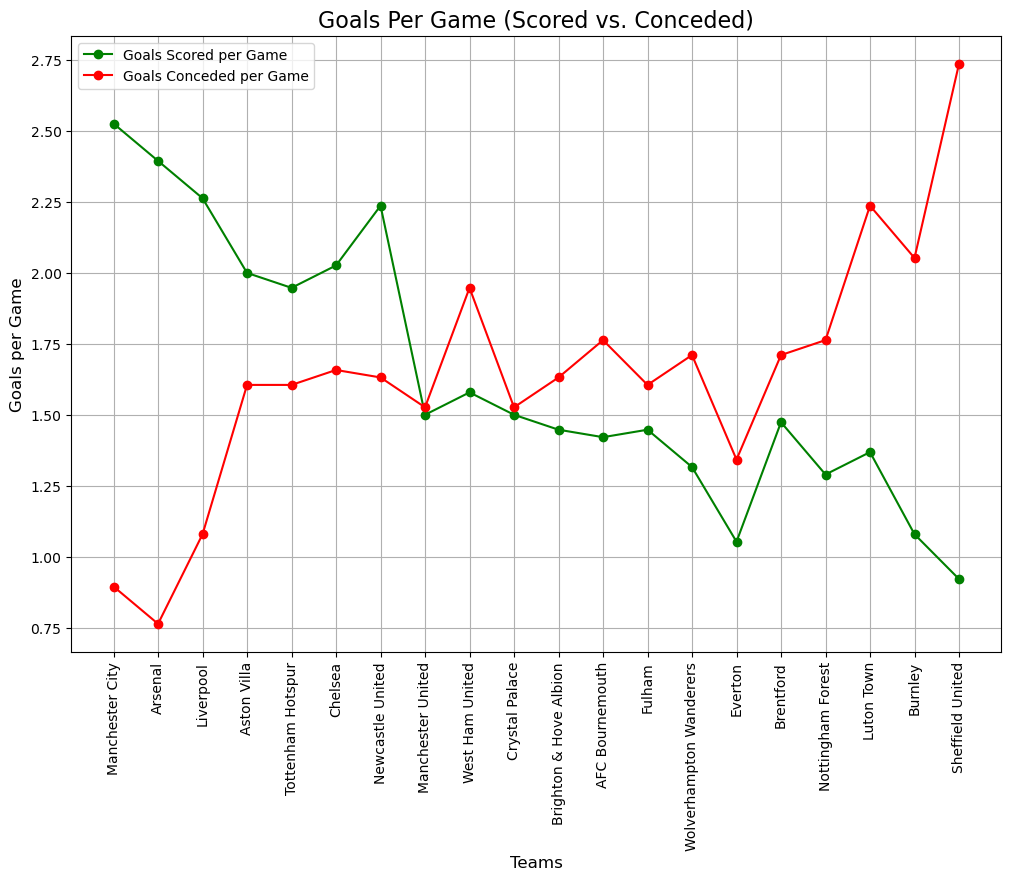

In [127]:
# Lines Plot: Goals Scored and Conceded Per Game by Team
plt.figure(figsize=(12, 8))
plt.plot(epl_data['name'], epl_data['goals_scored_per_game'], marker='o', label='Goals Scored per Game', color='green')
plt.plot(epl_data['name'], epl_data['goals_conceded_per_game'], marker='o', label='Goals Conceded per Game', color='red')
plt.xticks(rotation=90)
plt.title('Goals Per Game (Scored vs. Conceded)', fontsize=16)
plt.xlabel('Teams', fontsize=12)
plt.ylabel('Goals per Game', fontsize=12)
plt.legend()
plt.grid()
plt.show()